<a href="https://colab.research.google.com/github/Taweilo/house_price_predicttion/blob/main/Code_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIT License

Copyright (c) 2023 Tawei Lo

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# House Price Prediction

 <img src="https://www.bouzaien.com/post/house-pricing-prediction/featured.png" width="1100" height="450">

### Importing all the libraries

In [134]:
# Data wrangling
import pandas as pd # handle dataframe &
import numpy as np # deal with number and data

# Data vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML data preparation & cross-validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
from sklearn.preprocessing import StandardScaler # standardize the features
from sklearn.preprocessing import scale

# Statistical learning methods
import statsmodels.api as sm # linear regression
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

# ML methods
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree # Regression tree & plot the tree

# Ensembel methods
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

# Neural network
from tensorflow.keras.models import Sequential # put layers together
from tensorflow.keras.layers import Dense # define the layer

# Model evaluation
from sklearn.metrics import mean_squared_error

#Ignore Warning
import warnings
warnings.simplefilter("ignore")

# set the random seed fixed for code reproduction
SEED = 12345

## 2. Data Understanding

### 2.1 Loading the data
House Price Data

In [135]:
# Provide the raw file URL
csv_url = 'https://raw.githubusercontent.com/Taweilo/house_price_predicttion/main/Housing%20data.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_url)
# Display the first few rows of the DataFrame
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### 2.2 Feature Description

| Name | Modeling Role | Measurement Level| Description|
| ---- | ------------- | ---------------- | ---------- |
| **TV** | input | float | TV promotion budget (in million) |
| **Radio** | input | float | Radio promotion budget (in million) |
| **Social Media** | input | float | Social Media promotion budget (in million) |
| **Influencer** | input | float | Type of Influencers |
| **Sales** | target | float | Sales in million |

In [136]:
#check dimension
df.shape

(545, 13)

In [137]:
# check data type and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [138]:
# how many data are missing of each variable
null_counts = df.isnull().sum()
null_counts

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [139]:
# Assuming your DataFrame is named df
categorical_columns = df.select_dtypes(include=['object'])

# Check the data type of each object column
for column in categorical_columns:
    print(f"Column '{column}' , unique: {categorical_columns[column].unique()}")

Column 'mainroad' , unique: ['yes' 'no']
Column 'guestroom' , unique: ['no' 'yes']
Column 'basement' , unique: ['no' 'yes']
Column 'hotwaterheating' , unique: ['no' 'yes']
Column 'airconditioning' , unique: ['yes' 'no']
Column 'prefarea' , unique: ['yes' 'no']
Column 'furnishingstatus' , unique: ['furnished' 'semi-furnished' 'unfurnished']


In [140]:
# Descriptive analysis
df.describe().round(1)

,price,area,bedrooms,bathrooms,stories,parking
count,545.0,545.0,545.0,545.0,545.0,545.0
mean,4766729.2,5150.5,3.0,1.3,1.8,0.7
std,1870439.6,2170.1,0.7,0.5,0.9,0.9
min,1750000.0,1650.0,1.0,1.0,1.0,0.0
25%,3430000.0,3600.0,2.0,1.0,1.0,0.0
50%,4340000.0,4600.0,3.0,1.0,2.0,0.0
75%,5740000.0,6360.0,3.0,2.0,2.0,1.0
max,13300000.0,16200.0,6.0,4.0,4.0,3.0


In [141]:
corr = df.corr()
corr

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


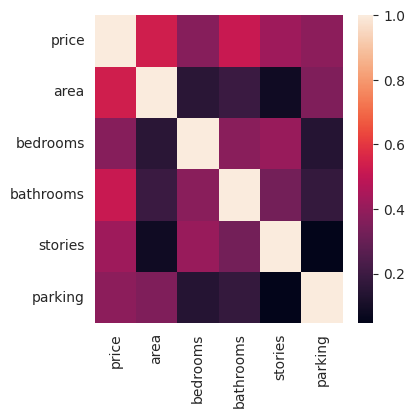

In [142]:
plt.figure(figsize=(4, 4))
_ = sns.heatmap(corr,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

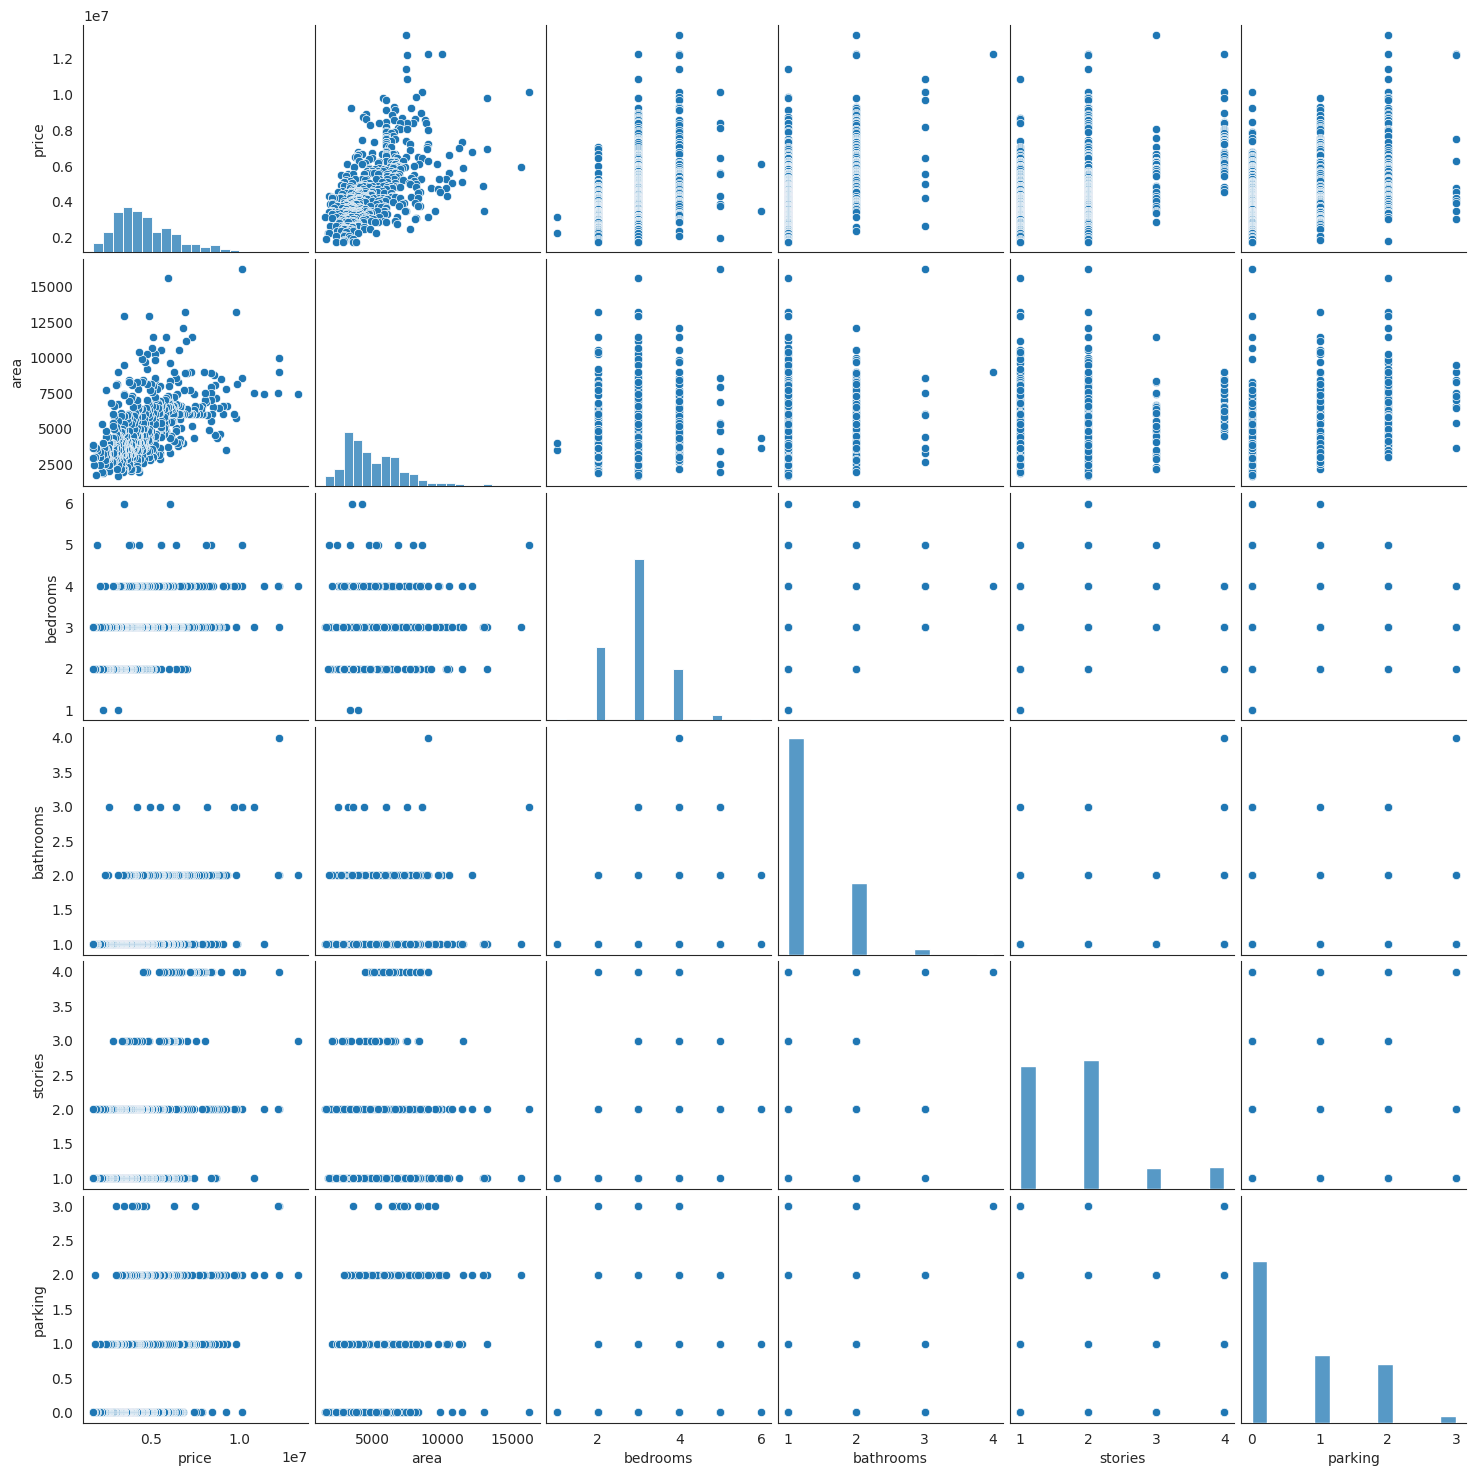

In [143]:
df_pairplot =columns_to_plot = df.select_dtypes(include=['int64'])
sns.pairplot(df_pairplot, palette="bright")
plt.show()

## 3. Data Preparation
### 3.1 Remove the null (data is clean no need of cleasing)

In [144]:
# Remove all rows with null values
df= df.dropna()

In [145]:
# check the missing data again --->no more missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### 3.2 Define variables

In [146]:
# Create X, Y
y = df['price'] # define Y
X = df.drop(['price'], axis=1) # define X by dropping irrelevent features
X = pd.get_dummies(data=X, drop_first=True) # make dummy variable
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0


### 3.3 Scale data

In [147]:
scaler = StandardScaler()
X_scale=scale(X)
y_scale=scale(y)

### 3.4 Split the data for train and test

In [148]:
X_train, X_test, y_train, y_test = train_test_split( X_scale, y_scale, test_size=0.3, random_state = 42) # split data 70% for training

In [150]:
print(X_train.shape) # 381 instances for taining
print(X_test.shape)  # 164 instances for testing

(381, 13)
(164, 13)


## 4. Modeling
### 4.1 Linear Regression

In [151]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

In [152]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X.columns))

area                               0.293872
bedrooms                           0.031920
bathrooms                          0.299464
stories                            0.193525
parking                            0.139623
mainroad_yes                       0.076062
guestroom_yes                      0.056433
basement_yes                       0.123216
hotwaterheating_yes                0.069004
airconditioning_yes                0.170569
prefarea_yes                       0.115508
furnishingstatus_semi-furnished   -0.032093
furnishingstatus_unfurnished      -0.098173
dtype: float64


In [153]:
mse_lr = round(mean_squared_error(y_test, y_pred),3)
print(f"Test MSE for Linear Regression is {mse_lr}")

Test MSE for Linear Regression is 0.44


### 4.2 LASSO CV

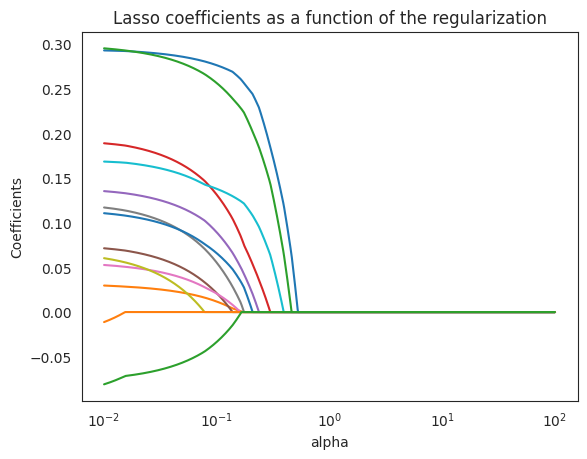

In [154]:
alphas = 10**np.linspace(-2,2,1000)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [155]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, cv=10, max_iter=1000) # CV= 5 folds
lassocv.fit(X_train, y_train)
print('The best alpha from LassoCV:', round(lassocv.alpha_,3))

The best alpha from LassoCV: 0.01


In [156]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X.columns))

The coefficients are:
area                               0.292636
bedrooms                           0.029661
bathrooms                          0.294991
stories                            0.188799
parking                            0.135270
mainroad_yes                       0.071341
guestroom_yes                      0.052654
basement_yes                       0.116974
hotwaterheating_yes                0.060265
airconditioning_yes                0.168324
prefarea_yes                       0.110571
furnishingstatus_semi-furnished   -0.011216
furnishingstatus_unfurnished      -0.080834
dtype: float64


In [157]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train_un), scale(y_train_un))
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train_un.columns))

The coefficients are:
area                               0.309286
bedrooms                           0.031505
bathrooms                          0.294975
stories                            0.198231
parking                            0.139130
mainroad_yes                       0.074513
guestroom_yes                      0.056512
basement_yes                       0.124374
hotwaterheating_yes                0.067515
airconditioning_yes                0.177677
prefarea_yes                       0.117069
furnishingstatus_semi-furnished   -0.013074
furnishingstatus_unfurnished      -0.085143
dtype: float64


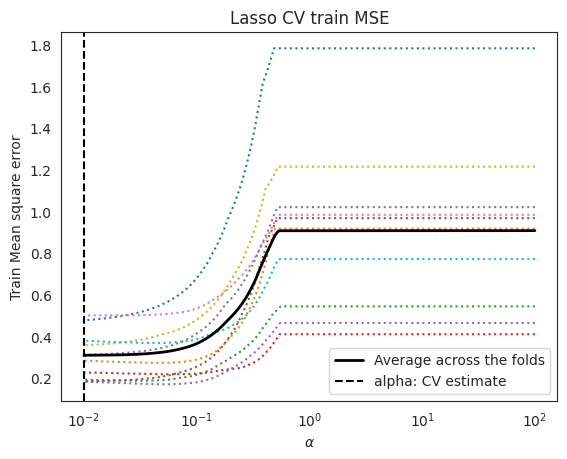

In [158]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Train Mean square error")
plt.legend()
plt.title("Lasso CV train MSE")
plt.show()

In [160]:
y_pred=lasso.predict(X_test)
mse_lasso = round(mean_squared_error(y_test, y_pred),3)
print(f"Test MSE for LassoCV is {mse_lasso}")

Test MSE for LassoCV is 0.43


### 4.3 Ridge CV

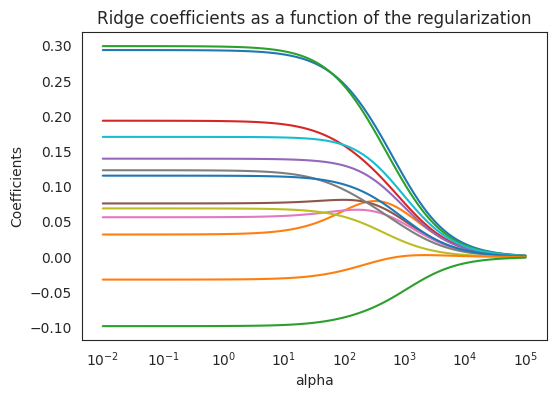

In [161]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

fig, ax1 = plt.subplots(figsize=(6, 4))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')

plt.title('Ridge coefficients as a function of the regularization');

In [46]:
scaler = StandardScaler().fit(X_train)

In [163]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(X_train, y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X.columns))

The coefficients are:
area                               0.112093
bedrooms                           0.063648
bathrooms                          0.103459
stories                            0.076237
parking                            0.070424
mainroad_yes                       0.051168
guestroom_yes                      0.046863
basement_yes                       0.042191
hotwaterheating_yes                0.021290
airconditioning_yes                0.085945
prefarea_yes                       0.053866
furnishingstatus_semi-furnished    0.001426
furnishingstatus_unfurnished      -0.047302
dtype: float64


In [165]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error') # cv= 5 folds
ridgecv.fit(X_train, y_train)
print('The best alpha from RidgeCV:', round(ridgecv.alpha_,2))

The best alpha from RidgeCV: 24.77


In [167]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(X_train, y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X.columns))

The coefficients are:
area                               0.279146
bedrooms                           0.044589
bathrooms                          0.282272
stories                            0.181690
parking                            0.137311
mainroad_yes                       0.078763
guestroom_yes                      0.060617
basement_yes                       0.113771
hotwaterheating_yes                0.065708
airconditioning_yes                0.168209
prefarea_yes                       0.112014
furnishingstatus_semi-furnished   -0.027778
furnishingstatus_unfurnished      -0.094310
dtype: float64


In [168]:
y_pred=ridge.predict(X_test)
mse_ridge = round(mean_squared_error(y_test, y_pred),3)
print(f"Test MSE for RidgeCV is {mse_ridge}")

Test MSE for RidgeCV is 0.44


### 4.4 Elastic net

In [170]:
ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(X_train, y_train)

print('The best alpha from ElasticNetCV:', round(ENcv.alpha_,3))

The best alpha from ElasticNetCV: 0.0


In [171]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(X_train, y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X.columns))

The coefficients are:
area                               0.293420
bedrooms                           0.031928
bathrooms                          0.298580
stories                            0.192696
parking                            0.139053
mainroad_yes                       0.075558
guestroom_yes                      0.056074
basement_yes                       0.122256
hotwaterheating_yes                0.067884
airconditioning_yes                0.170264
prefarea_yes                       0.114843
furnishingstatus_semi-furnished   -0.029469
furnishingstatus_unfurnished      -0.095991
dtype: float64


In [173]:
y_pred = EN.predict(X_test)
mse_EN = round(mean_squared_error(y_test, y_pred), 3)
print(f"Test MSE for ElasticNetCV is {mse_EN}")

Test MSE for ElasticNetCV is 0.44


### 4.5 KNN

In [174]:
mse_train = [-1]*50
mse_test = [-1]*50
for K in range(50):
    model = KNeighborsRegressor(n_neighbors = K+1)
    model.fit(X_train, y_train)  #fit the model
    mse_train[K] = mean_squared_error(y_train, model.predict(X_train))
    mse_test[K] = mean_squared_error(y_test, model.predict(X_test))

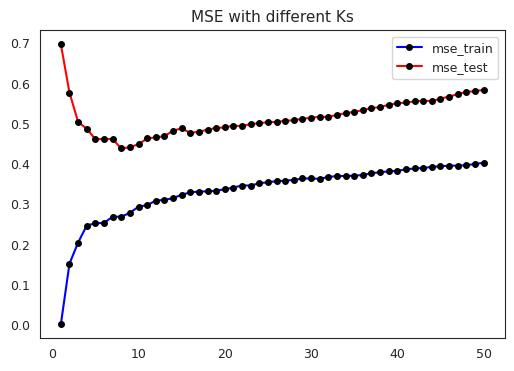

In [175]:
fig, ax1 = plt.subplots(figsize=(6, 4))
plt.plot(np.arange(50)+1, mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(50)+1, mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=9)
plt.title('MSE with different Ks', fontsize=11)
plt.tick_params(labelsize=9)
plt.show()

In [176]:
# optimal k
np.argmin(mse_test)+1

8

In [177]:
# optimal MSE
print(f"Test MSE for KNN is {round(min(mse_test),3)}")

Test MSE for KNN is 0.44


### KNN CV

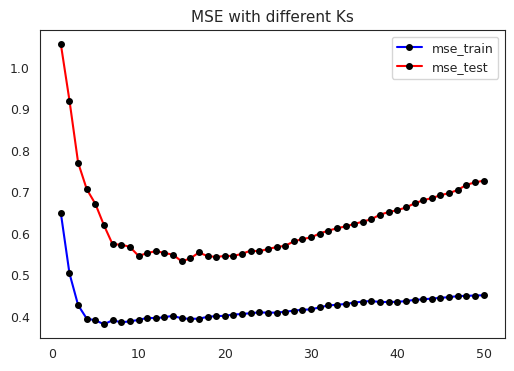

In [178]:
mse_train = []
mse_test = []
for K in range(1, 51):
    knn = KNeighborsRegressor(n_neighbors=K)
    scores_train = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    scores_test = -cross_val_score(knn, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
    mse_train.append(np.mean(scores_train))
    mse_test.append(np.mean(scores_test))

fig, ax1 = plt.subplots(figsize=(6, 4))
plt.plot(np.arange(50)+1, mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(50)+1, mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=9)
plt.title('MSE with different Ks', fontsize=11)
plt.tick_params(labelsize=9)
plt.show()

In [179]:
# optimal k
opt_k=np.argmin(mse_test)+1
opt_k

15

In [180]:
# optimal MSE
opt_mse=round(min(mse_test),3)
print(f"Test MSE for KnnCV is {opt_mse}")

Test MSE for KnnCV is 0.533


### 4.7 Decision Tree Regressor CV

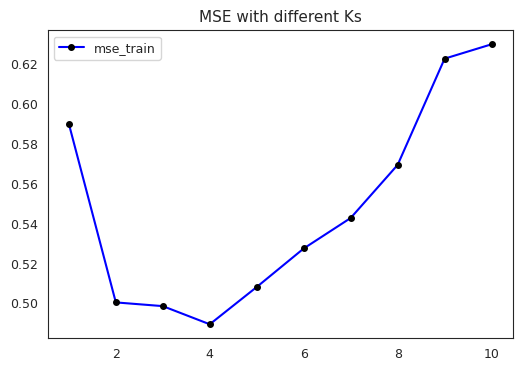

,max_depth,train MSE
0,1,0.590085
1,2,0.500489
2,3,0.498625
3,4,0.489516
4,5,0.508219
5,6,0.527540
6,7,0.542850
7,8,0.569485
8,9,0.622791
9,10,0.630004



The best model has max_depth=4 with a cross-validation train MSE of 0.49.


In [181]:
# create list to store the mse for each value of max_depth
mse_dtr = []

# fit regression tree and evaluate using cross-validation for max_depth from 1 to 10
for i in range(1, 11):
    dtc_i = DecisionTreeRegressor(max_depth=i, random_state=0)
    # perform 5-fold cross-validation and get the mean squared error
    cv_mse_dtr  = -cross_val_score(dtc_i, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    mse_dtr.append(cv_mse_dtr )

fig, ax1 = plt.subplots(figsize=(6, 4))
plt.plot(np.arange(10)+1, mse_dtr,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.legend(fontsize=9)
plt.title('MSE with different Ks', fontsize=11)
plt.tick_params(labelsize=9)
plt.show()

df.dtr = pd.DataFrame({'max_depth': np.arange(10) + 1, 'train MSE': mse_dtr})
display(df.dtr)  # Display the DataFrame using the display() function

# find the index of the model with the lowest MSE
best_model_idx = np.argmin(mse_dtr)
best_mse_dtr = mse_dtr[best_model_idx]
print(f"\nThe best model has max_depth={best_model_idx+1} with a cross-validation train MSE of {round(best_mse_dtr,3)}.")

Test MSE for regression tree is 0.93


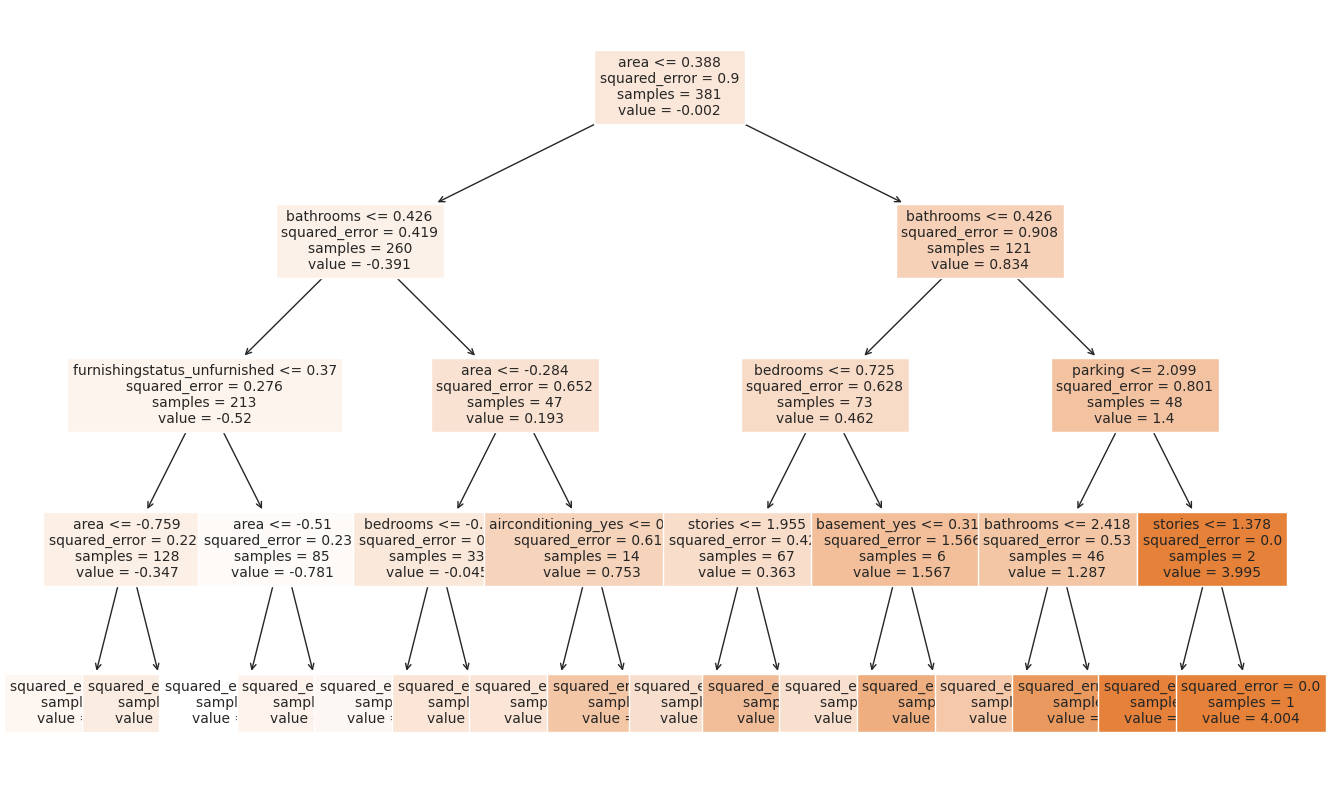

In [185]:
# Visualize regression tree
regr_tree =  DecisionTreeRegressor(max_depth=best_model_idx+1,random_state = 0)
model=regr_tree.fit(X_train,y_train)
fn = X.columns
cn = y.unique()
plt.figure(figsize = (16,10))
plot_tree(regr_tree, feature_names = fn, class_names = cn, filled = True, fontsize=10);
y_pred=regr_tree.predict(scale(X_test))
mse_regr_tree = round(mean_squared_error(y_test, y_pred),2)
print(f"Test MSE for regression tree is {mse_regr_tree}")

### 4.6 Bagging

In [186]:
# default estimator is decision tree
# n_estimator: The number of base estimators in the ensemble.
regr_bag = BaggingRegressor(n_estimators=10, random_state=0).fit(X_train, y_train)

In [188]:
y_pred=regr_bag.predict(X_test)
mse_bagging = round(mean_squared_error(y_test, y_pred),3)
print(f"Test MSE for Bagging is {mse_bagging}")

Test MSE for Bagging is 0.617


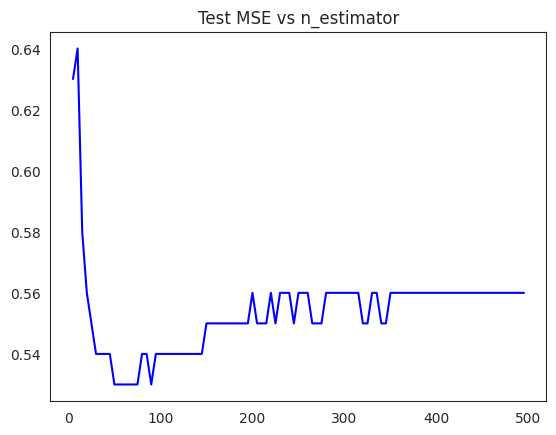

In [191]:
mse_list_bagging = []
n_list = np.arange(5,500,5)
for n in n_list:
    regr_bag = BaggingRegressor(n_estimators=n,random_state=0).fit(scale(X_train), y_train)
    y_pred=regr_bag.predict(X_test)
    mse_bagging = round(mean_squared_error(y_test, y_pred),2)
    mse_list_bagging.append(mse_bagging)

plt.plot(n_list, mse_list_bagging,  color = 'blue', markerfacecolor = 'black',label = 'Test MSE')
plt.title('Test MSE vs n_estimator')
plt.show()

### 4.7 Random Forest

In [192]:
regr_RF = RandomForestRegressor(n_estimators=10, random_state=0).fit(scale(X_train), y_train)

In [194]:
y_pred=regr_RF.predict(X_test)
mse_RF = round(mean_squared_error(y_test, y_pred),3)
print(f"Test MSE for Ranom Forest is {mse_RF}")

Test MSE for Ranom Forest is 0.634


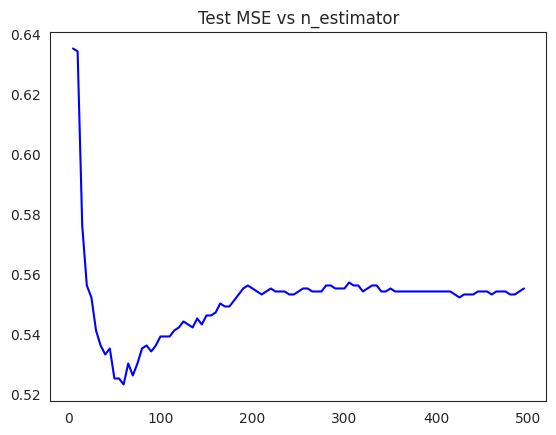

In [197]:
mse_list_RF = []
n_list = np.arange(5,500,5)
for n in n_list:
    regr_RF = RandomForestRegressor(n_estimators=n,random_state=0).fit(scale(X_train), y_train)
    y_pred=regr_RF.predict(X_test)
    mse_RF = round(mean_squared_error(y_test, y_pred),3)
    mse_list_RF.append(mse_RF)

plt.plot(n_list, mse_list_RF,  color = 'blue', markerfacecolor = 'black',label = 'Test MSE')
plt.title('Test MSE vs n_estimator')
plt.show()

#### Feature Importance

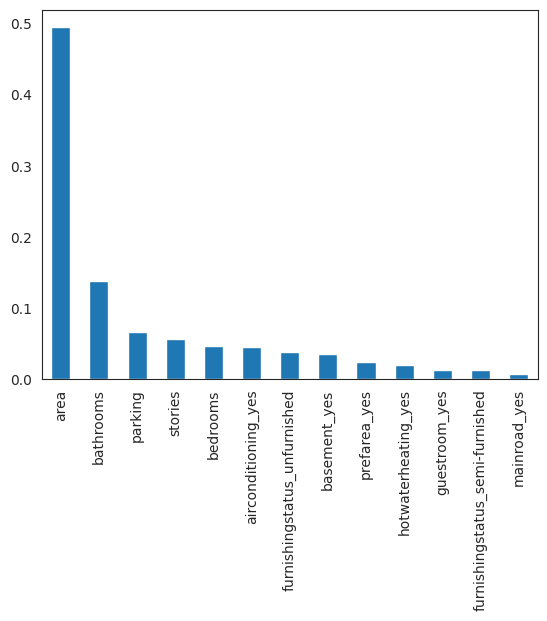

In [201]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(regr_RF.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [202]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2',None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(scale(X_train), y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
rf_random.best_params_

{'n_estimators': 944,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': 20,
 'bootstrap': True}

In [ ]:
best_rd = rf_random.best_estimator_

In [ ]:
y_pred = best_rd.predict(scale(X_test.values))
mse_RF_cv = round(mean_squared_error(y_test, y_pred), 2)
print(f"Test MSE for RF hyperparameter tuning is {mse_RF_cv}")

Test MSE for RF hyperparameter tuning is 15.91


### 4.7 Gradient Decent

In [ ]:
regr_GB = GradientBoostingRegressor(learning_rate=0.1, random_state=0).fit(X_train, y_train)

In [ ]:
y_pred=regr_GB.predict(scale(X_test))
mse_GB = round(mean_squared_error(y_test, y_pred),2)
print(f"Test MSE for Gradient Decent is {mse_GB}")

Test MSE for Gradient Decent is 15.35


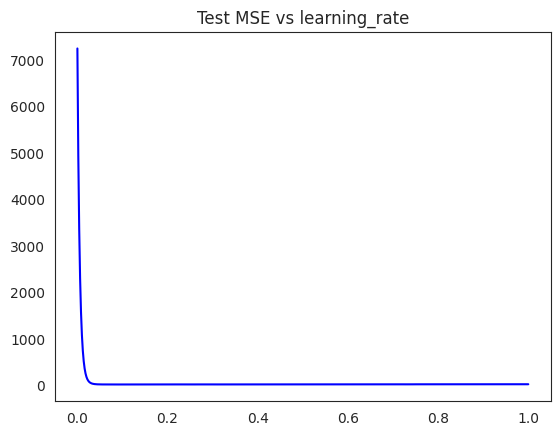

In [ ]:
mse_list_GB = []
rate_list = np.arange(0.001,1,0.001)
for rate in rate_list:
    regr_GB = GradientBoostingRegressor(learning_rate=rate, random_state=0).fit(X_train, y_train)
    y_pred=regr_GB.predict(X_test))
    mse_GB = round(mean_squared_error(y_test, y_pred),3)
    mse_list_GB.append(mse_GB)

plt.plot(rate_list, mse_list_GB,  color = 'blue', markerfacecolor = 'black',label = 'Test MSE')
plt.title('Test MSE vs learning_rate')
plt.show()

### 4.8 XGBoost

In [ ]:
regr_xgb=xgb.XGBRegressor(eval_metric='rmse')

param_grid = {"max_depth":    [1, 2 , 4, 5, 6, 8, 10],
        "n_estimators": [20, 50, 100, 200, 500, 800, 1000],
        "learning_rate": [0.01,  0.015, 0.05 , 0.1]}

search = GridSearchCV(regr_xgb, param_grid, cv=5).fit(scale(X_train), y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 2, 'n_estimators': 800}


In [ ]:
regr_xgb=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmse')

regr_xgb.fit(scale(X_train), y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred=regr_xgb.predict(scale(X_test.values))
mse_xgb = round(mean_squared_error(y_test, y_pred),2)
print(f"Test MSE for XGBoost regressor is {mse_xgb}")

Test MSE for XGBoost regressor is 15.26


In [ ]:
search.best_params_

{'learning_rate': 0.015, 'max_depth': 2, 'n_estimators': 800}

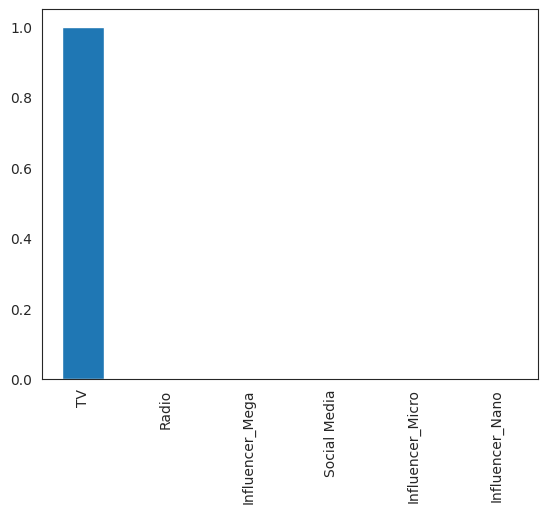

In [ ]:
feature_importances = pd.Series(regr_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

## Neural Network

- https://www.ibm.com/topics/neural-networks

<img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/3a/b8/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork.component.simple-narrative-xl-retina.ts=1679336162077.png/content/adobe-cms/us/en/topics/neural-networks/jcr:content/root/table_of_contents/intro/simple_narrative/image" width="500">

- Explanation on Youtube: https://youtu.be/aircAruvnKk


In [ ]:
# define the keras model
regr_nn = Sequential()
regr_nn.add(Dense(20, input_shape=(X_train.shape[1],), activation='relu'))
regr_nn.add(Dense(10, activation='relu'))
regr_nn.add(Dense(10, activation='relu'))
regr_nn.add(Dense(1, activation='linear')) # linear for regression; sigmoid/softmax for classification

In [ ]:
# compile the keras model
regr_nn.compile(loss='MeanSquaredError', optimizer='adam', metrics=['MeanSquaredError'])

In [ ]:
# fit the keras model on the dataset
regr_nn.fit(scale(X_train), y_train, epochs=100, batch_size=10)

Epoch 1/100
273/273 [==============================] - 2s 3ms/step - loss: 43068.6758 - mean_squared_error: 43068.6719
Epoch 2/100
273/273 [==============================] - 1s 3ms/step - loss: 7873.1338 - mean_squared_error: 7873.1338
Epoch 3/100
273/273 [==============================] - 1s 3ms/step - loss: 740.0656 - mean_squared_error: 740.0656
Epoch 4/100
273/273 [==============================] - 1s 3ms/step - loss: 373.2152 - mean_squared_error: 373.2152
Epoch 5/100
273/273 [==============================] - 1s 3ms/step - loss: 221.0547 - mean_squared_error: 221.0547
Epoch 6/100
273/273 [==============================] - 1s 3ms/step - loss: 139.0808 - mean_squared_error: 139.0808
Epoch 7/100
273/273 [==============================] - 1s 3ms/step - loss: 93.3786 - mean_squared_error: 93.3786
Epoch 8/100
273/273 [==============================] - 1s 4ms/step - loss: 68.7005 - mean_squared_error: 68.7005
Epoch 9/100
273/273 [==============================] - 1s 4ms/step - loss: 53.

In [ ]:
y_pred=regr_nn.predict(scale(X_test.values))
mse_nn = round(mean_squared_error(y_test, y_pred),2)
print(f"test MSE for Nerural Netwoek is {mse_nn}")

57/57 [==============================] - 0s 2ms/step
test MSE for Nerural Netwoek is 13.47


## 5. Evaluation

In [ ]:
# Define data
model_names = ['Linear Regression', 'Lasso CV', 'Ridge CV', 'Elastic Net CV',
        'KNN CV','Decision Tree Regressor CV', 'Bagging', 'Random Forest CV',
        'XG boost', 'Neural Network']
mse_values = [ mse_lr, mse_lasso, mse_ridge, mse_EN,
         opt_mse, mse_regr_tree, mse_bagging, mse_RF_cv, mse_xgb, mse_nn]
hyperparameters = ["N/A",
           f"alpha= {round(lassocv.alpha_,2)}",
           f"alpha= {round(ridgecv.alpha_,2)}",
           f"alpha= {round(ENcv.alpha_,2)}",
           f"k={opt_k}",
           f"max_depth= {best_model_idx+1}",
           "n_estimators=10",
          "n_estimators: 944, min_samples_split: 10, min_samples_leaf: 4, max_depth: 20",
          "learning_rate: 0.015, max_depth: 2, n_estimators: 800",
           "N/A"]
# Create table
df.evaluation = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_values,
    'Hyperparameters': hyperparameters
})
# Print table
display(df.evaluation)

,Model,MSE,Hyperparameters
0,Linear Regression,8.74,N/A
1,Lasso CV,13.54,alpha= 0.08
2,Ridge CV,13.39,alpha= 0.1
3,Elastic Net CV,140.91,alpha= 0.19
4,KNN CV,12.71,k=15
5,Decision Tree Regressor CV,32900.76,max_depth= 7
6,Bagging,17.13,n_estimators=10
7,Random Forest CV,15.91,"n_estimators: 944,<br> min_samples_split: 10, min_samples_leaf: 4, max_depth: 20"
8,XG boost,15.26,"learning_rate: 0.015, max_depth: 2, n_estimators: 800"
9,Neural Network,13.47,N/A


## 6. Discussion

In [ ]:
# Assuming you have already fitted the linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Add a constant column to the X_train data for the intercept term in the model
X_train_with_const = sm.add_constant(X_train)

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train_with_const).fit()

# Print the summary table
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.474e+05
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:26:01   Log-Likelihood:                -6815.8
No. Observations:                2727   AIC:                         1.365e+04
Df Residuals:                    2720   BIC:                         1.369e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2036      0.170  

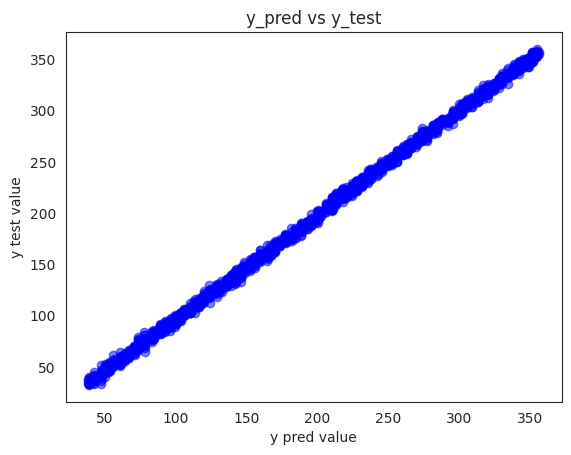

,y pred,y test
0,60.741695,54.732757
6,200.159622,198.679825
7,113.796577,108.733932
8,270.286407,270.189400
12,227.775131,229.632381


In [ ]:
# Create table
df_lr = pd.DataFrame({
    'y pred': y_pred,
    'y test': y_test
})
# Sorting the DataFrame by index
df_lr = df_lr.sort_index()

# Create a scatter plot with markers and transparency
plt.scatter(y_pred, y_test, color='blue', label='y_pred', alpha=0.5)

# Add labels and title
plt.xlabel('y pred value')
plt.ylabel('y test value')
plt.title('y_pred vs y_test')

# Display the plot
plt.show()

# Display the DataFrame
display(df_lr.head())